In [2]:
import os
import glob

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
def plt_dfs(path):
    paths = glob.glob(path, recursive=True) # ファイル名のリストを取得

    from natsort import natsorted
    paths = natsorted(paths, key=lambda x: (os.path.dirname(x), os.path.basename(x))) # パスのディレクトリ名とファイル名をタプルにしてソートの基準にする

    graph_num = len(paths)

    if graph_num == 0: print("no graphs")
    else:
        print(f"{graph_num} graphs")
        dfs = [pd.read_csv(path) for path in paths]
    # figはウィンドウ、axesは1つのグラフ。axsにはaxesがいっぱい入ってるってイメージ
        fig, axs = plt.subplots(2, len(dfs), dpi=300, figsize=(6*len(dfs), 8), sharey="row")
        axs = axs.reshape(2, len(dfs))

        for j, df in enumerate(dfs):
            ax = axs[0, j]
            x, y = df["epoch"], df["Acc"]
            # ax.set_xlabel(x.name)
            if j == 0: ax.set_ylabel(y.name)
            ax.plot(x, y, label="tarin")
            
            x, y = df["epoch"], df["vAcc"]
            ax.plot(x, y, label="val")
            ax.set_title(paths[j], fontdict={"color":"#3e424d", "alpha":1.0})
            last_x, last_y = x.iloc[-1], y.iloc[-1]
            ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-70, -25), textcoords="offset points", fontsize=20, color="#ffbe26", fontweight="bold")
            ax.legend(fontsize=18)
            # ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#ffbe26", fontweight="bold")
            # ax.legend()

            ax = axs[1, j]
            x, y = df["epoch"], df["Loss"]
            ax.set_yscale("log")
            # ax.set_xlabel(x.name)
            if j == 0: ax.set_ylabel(y.name)
            ax.plot(x, y, label="tarin")

            x, y = df["epoch"], df["vLoss"]
            ax.plot(x, y, label="val")
            last_x, last_y = x.iloc[-1], y.iloc[-1]
            ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#ffbe26", fontweight="bold")
            
            min_value = df["vLoss"].min() # vLoss列の最小値
            min_rows = df[df["vLoss"] == min_value].index # 最小値の行インデックス
            for row in min_rows: ax.annotate(f"{min_value:.4}", xy=(row, min_value), xytext=(-20, -15), textcoords="offset points", fontsize=10, color="#ffbe26", fontweight="bold")
            ax.legend()
            
        for ax_row in axs:
            for ax in ax_row:
                ax.grid(True, color="#3e424d", alpha=0.1)

        plt.show()


In [113]:
def disp_lastval(ax, x, y, label=None):
    last_x, last_y = x.iloc[-1], y.iloc[-1]
    # ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-70, -25), textcoords="offset points", fontsize=20, color="#ffbe26", fontweight="bold")
    if label is None: ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")
    else: ax.annotate(f"{label}:{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")

def disp_100epoch_i(ax, x, y):
    for i in range(len(x)-2):
        if y[i] + 0.05 < y[i+1] and y[i-1] + 0.05 >= y[i]:
            j = i+2
            ax.annotate(str(y[j]), xy=(x[j], y[j]), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")
    # last_x, last_y = x.iloc[-1], y.iloc[-1]
    # if label is None: ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")
    # else: ax.annotate(f"{label}:{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")


def disp_100epoch_c(ax, x, y):
    for i in range(len(x)-2):
        if y[i] - 0.05 >= y[i+1] and y[i-1] - 0.05 < y[i]:
            j = i + 1
            ax.annotate(str(y[j]), xy=(x[j], y[j]), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")
    # last_x, last_y = x.iloc[-1], y.iloc[-1]
    # if label is None: ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")
    # else: ax.annotate(f"{label}:{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#444444", fontweight="bold")

In [114]:
import os
import glob

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
def plt_dfs(path):
    paths = glob.glob(path, recursive=True) # ファイル名のリストを取得

    from natsort import natsorted
    paths = natsorted(paths, key=lambda x: (os.path.dirname(x), os.path.basename(x))) # パスのディレクトリ名とファイル名をタプルにしてソートの基準にする

    graph_num = len(paths)
    if graph_num == 0: print("no graphs")
    else:
        print(f"{graph_num} graphs")
        dfs = [pd.read_csv(path) for path in paths]
    # figはウィンドウ、axesは1つのグラフ。axsにはaxesがいっぱい入ってるってイメージ
        fig, axs = plt.subplots(2, len(dfs), dpi=300, figsize=(6*len(dfs), 8), sharey="row")
        axs = axs.reshape(2, len(dfs))

        for j, df in enumerate(dfs):
            ax = axs[0, j]
            ax.set_title(paths[j], fontdict={"color":"#3e424d", "alpha":1.0})
            for c in df.columns.values:
                if c == 'epoch': x = df[c]
                elif 'vAcc' in c:
                    y = df[c]
                    if j == 0: ax.set_ylabel('vAcc')
                    ax.plot(x, y, label=c)
                    # disp_100epoch_c(ax, x, y, label=c)
                    if c == 'ivAcc': disp_100epoch_i(ax, x, y)
                    # if c == 'vAcc': disp_100epoch_c(ax, x, y)
                    disp_lastval(ax, x, y, label=c)
                    ax.legend()
                    # ax.legend(fontsize=18)
                    
            # ax.plot(x, y, label="tarin")
            
            # x, y = df["epoch"], df["vAcc"]
            # ax.plot(x, y, label="val")

            ax = axs[1, j]
            x, y = df["epoch"], df["Loss"]
            ax.set_yscale("log")
            # ax.set_xlabel(x.name)
            if j == 0: ax.set_ylabel(y.name)
            ax.plot(x, y, label="tarin")

            x, y = df["epoch"], df["vLoss"]
            ax.plot(x, y, label="val")
            last_x, last_y = x.iloc[-1], y.iloc[-1]
            ax.annotate(f"{last_y:.4f}", xy=(last_x, last_y), xytext=(-25, -15), textcoords="offset points", fontsize=10, color="#ffbe26", fontweight="bold")
            
            min_value = df["vLoss"].min() # vLoss列の最小値
            min_rows = df[df["vLoss"] == min_value].index # 最小値の行インデックス
            for row in min_rows: ax.annotate(f"{min_value:.4}", xy=(row, min_value), xytext=(-20, -15), textcoords="offset points", fontsize=10, color="#ffbe26", fontweight="bold")
            ax.legend()
            
        for ax_row in axs:
            for ax in ax_row:
                ax.grid(True, color="#3e424d", alpha=0.1)

        plt.show()


5 graphs


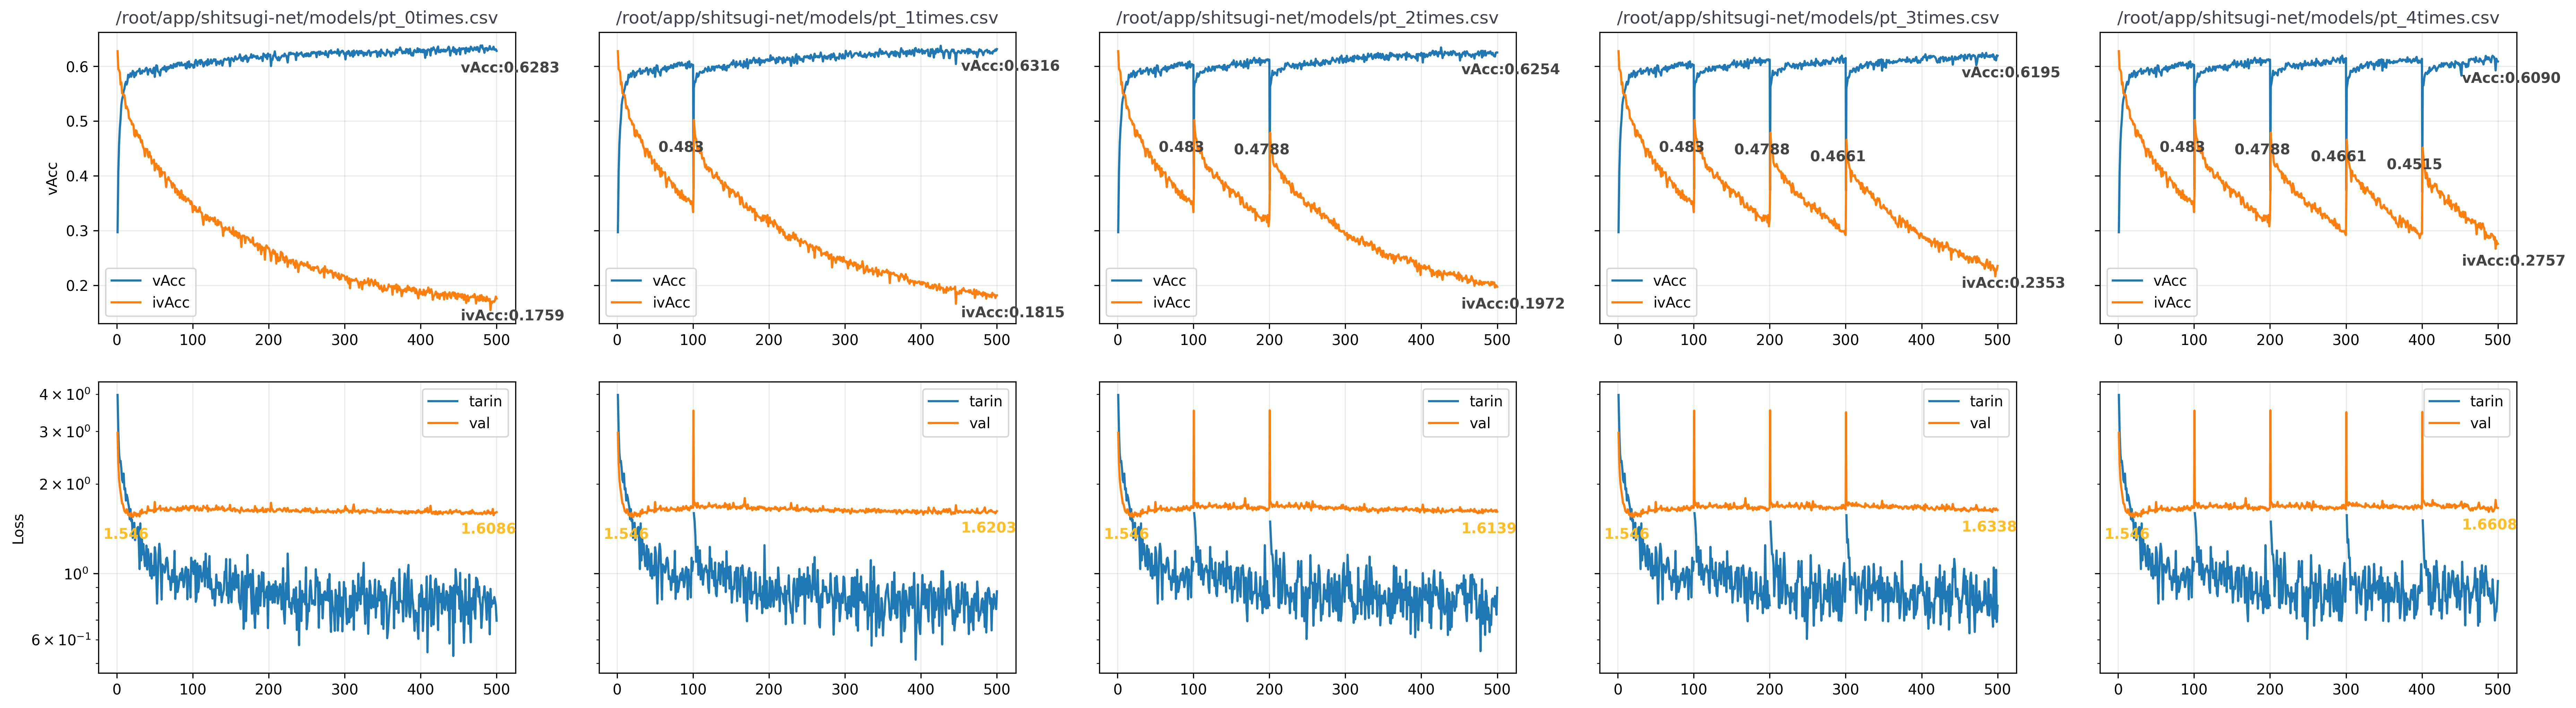

In [115]:
# path = "/root/app/shitsugi-net/**/*.csv"
# path = "/root/app/shitsugi_first/cal_pt*s.csv"
# path = "/root/app/cal_pt_0*s.csv"
# path = "/root/app/cal_pt_1*s.csv"
# path = "/root/app/shitsugi_first/cal_xe*s.csv"
# path = "/root/app/shitsugi_first/pt*s.csv"
# path = "/root/app/shitsugi_first/cal_pt_pure.csv"
# path = "/root/app/cal_pt_0*s.csv"
# path = "/root/app/shitsugi_first/pt_{j}_{i}times.ckpt"
# path = "/root/app/in_pt_0*s.csv"
# path = "/root/app/in_pt_1*s.csv"
path = '/root/app/shitsugi-net/**/*.csv'
plt_dfs(path)